<a href="https://colab.research.google.com/github/pallikadhingra/Practice-Git/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.float_format', lambda x: "%.3f" % x)
#to display values in floating point format in case of exponential format

In [4]:
import warnings
warnings.filterwarnings("ignore")
#to ignore any warnings

Gather and Clean Data

In [5]:
#kaggle dataset: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

In [6]:
df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")

**Exploring the Data**

Display Top 5 Rows

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690,7,26.142,548.971,1/5/2019,13:08,Ewallet,522.830,4.762,26.142,9.100
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280,5,3.820,80.220,3/8/2019,10:29,Cash,76.400,4.762,3.820,9.600
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330,7,16.215,340.526,3/3/2019,13:23,Credit card,324.310,4.762,16.215,7.400
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220,8,23.288,489.048,1/27/2019,20:33,Ewallet,465.760,4.762,23.288,8.400
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310,7,30.209,634.379,2/8/2019,10:37,Ewallet,604.170,4.762,30.209,5.300


Check Last 5 rows

In [8]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.350,1,2.018,42.367,1/29/2019,13:46,Ewallet,40.350,4.762,2.018,6.200
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.380,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.800,4.762,48.690,4.400
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.840,1,1.592,33.432,2/9/2019,13:22,Cash,31.840,4.762,1.592,7.700
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.820,1,3.291,69.111,2/22/2019,15:33,Cash,65.820,4.762,3.291,4.100
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.340,7,30.919,649.299,2/18/2019,13:28,Cash,618.380,4.762,30.919,6.600


Find Shape of Dataset

In [9]:
df.shape

(1000, 17)

Get Info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Check Null values

In [13]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Check for Duplicate Values

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.shape

(1000, 17)

Get Overall Statistics

In [20]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,55.672,5.510,15.379,322.967,307.587,4.762,15.379,6.973
std,26.495,2.923,11.709,245.885,234.177,0.000,11.709,1.719
min,10.080,1.000,0.508,10.678,10.170,4.762,0.508,4.000
25%,32.875,3.000,5.925,124.422,118.498,4.762,5.925,5.500
50%,55.230,5.000,12.088,253.848,241.760,4.762,12.088,7.000
75%,77.935,8.000,22.445,471.350,448.905,4.762,22.445,8.500
max,99.960,10.000,49.650,1042.650,993.000,4.762,49.650,10.000


Drop Unnecessary Columns

In [21]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690,7,26.142,548.971,1/5/2019,13:08,Ewallet,522.830,4.762,26.142,9.100
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280,5,3.820,80.220,3/8/2019,10:29,Cash,76.400,4.762,3.820,9.600


In [22]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [24]:
df.drop(columns = ["Time"], inplace = True)

In [25]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

Hypothesis 1: Electronic products have the highest Rating compared to other product categories

In [28]:
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [46]:
prod = df.pivot_table(index = "Product line", values = "Rating", aggfunc = "mean")
prod

,Rating
Product line,
Electronic accessories,6.925
Fashion accessories,7.029
Food and beverages,7.113
Health and beauty,7.003
Home and lifestyle,6.838
Sports and travel,6.916


In [47]:
df.pivot_table(index = "Product line", values = "Rating", aggfunc = "mean").max()

Rating   7.113
dtype: float64

In [37]:
#Therefore, the hypothesis is incorrect

In [48]:
prod.index

Index(['Electronic accessories', 'Fashion accessories', 'Food and beverages',
       'Health and beauty', 'Home and lifestyle', 'Sports and travel'],
      dtype='object', name='Product line')

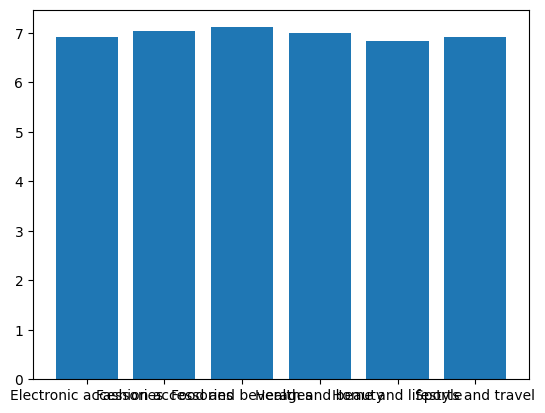

In [49]:
plt.bar(prod.index, prod["Rating"])
plt.show()

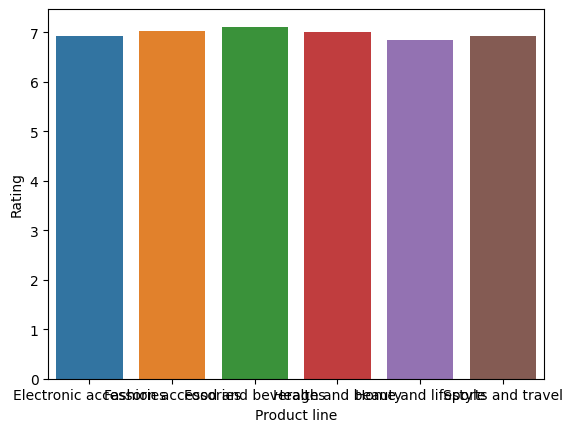

In [51]:
sns.barplot(x = prod.index, y = "Rating", data = prod)
plt.show()

Max Payements

In [52]:
df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

<Axes: xlabel='Payment', ylabel='count'>

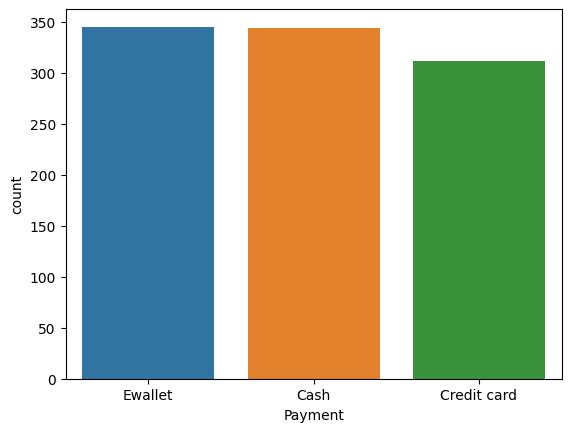

In [53]:
sns.countplot(x = "Payment", data = df)

City-wise purchaseS

In [54]:
df["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

<Axes: xlabel='City', ylabel='count'>

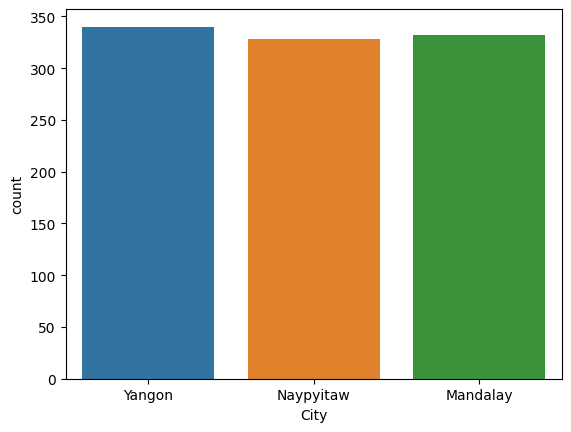

In [55]:
sns.countplot(x = "City", data = df)

Branch wise

In [56]:
df["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [57]:
br = df.pivot_table(index = "Branch", values = "Rating", aggfunc = "mean")
br

,Rating
Branch,
A,7.027
B,6.818
C,7.073


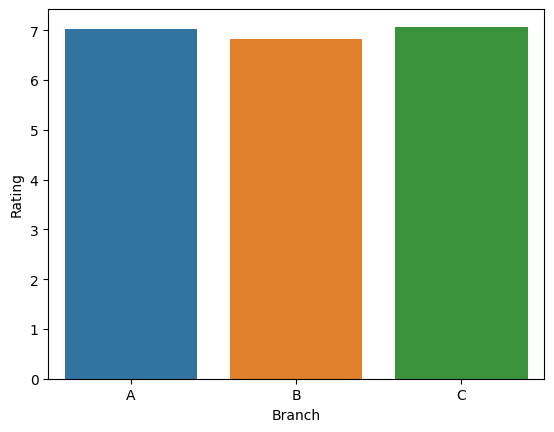

In [58]:
sns.barplot(x = br.index, y = "Rating", data = br)
plt.show()

In [60]:
br2 = df.pivot_table(index = "Branch", values = "Quantity", aggfunc = "sum")
br2

,Quantity
Branch,
A,1859
B,1820
C,1831


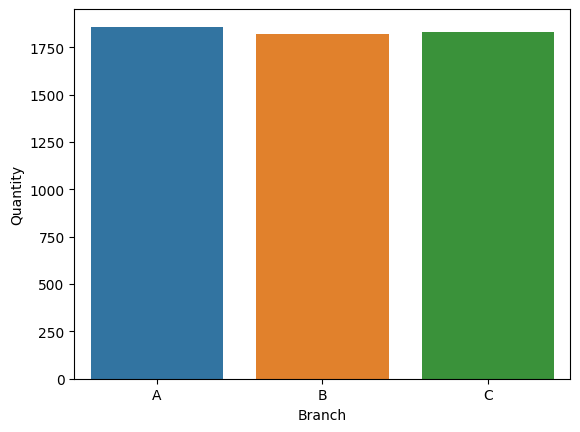

In [61]:
sns.barplot(x = br2.index, y = "Quantity", data = br2)
plt.show()